In [65]:
# Dependencies
import requests
import pandas as pd
import time
import scipy.stats as sts
from dateutil.relativedelta import relativedelta
from matplotlib import pyplot as plt
from datetime import datetime
from pprint import pprint
from config import news_api

In [66]:
shooting_df = pd.read_csv('Resources/shootings.csv')
shooting_df

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4890,5916,Rayshard Brooks,2020-06-12,shot,Taser,27.0,M,Black,Atlanta,GA,False,attack,Foot,True,Electrical devices
4891,5925,Caine Van Pelt,2020-06-12,shot,gun,23.0,M,Black,Crown Point,IN,False,attack,Car,False,Guns
4892,5918,Hannah Fizer,2020-06-13,shot,unarmed,25.0,F,White,Sedalia,MO,False,other,Not fleeing,False,Unarmed
4893,5921,William Slyter,2020-06-13,shot,gun,22.0,M,White,Kansas City,MO,False,other,Other,False,Guns


In [67]:
# convert date string to datetime component
# defining consist 'scale' of months to combine with other datasets
shooting_df['clean_date'] = ''

for index, row in shooting_df.iterrows():
#     shooting_df.loc[index, 'clean_date'] = datetime.strptime(row['date'], '%Y-%m-%d')
    shooting_df.loc[index, 'clean_date'] = datetime.strptime(row['date'], '%Y-%m-%d').strftime('%Y-%m')
shooting_df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category,clean_date
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns,2015-01
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns,2015-01
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed,2015-01
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects,2015-01
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects,2015-01


In [68]:
# extracting only unarmed victims
unarmed_df = shooting_df.loc[shooting_df['armed'] == 'unarmed'].reset_index(drop=True)
unarmed_df['year'] = ''

for index, row in unarmed_df.iterrows():
    unarmed_df.loc[index, 'year'] = datetime.strptime(row['date'], '%Y-%m-%d').strftime('%Y')
unarmed_df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category,clean_date,year
0,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed,2015-01,2015
1,16,Autumn Steele,2015-01-06,shot,unarmed,34.0,F,White,Burlington,IA,False,other,Not fleeing,True,Unarmed,2015-01,2015
2,36,Artago Damon Howard,2015-01-08,shot,unarmed,36.0,M,Black,Strong,AR,False,attack,Not fleeing,False,Unarmed,2015-01,2015
3,352,Joshua Omar Garcia,2015-01-26,shot,unarmed,24.0,M,Hispanic,Tahoka,TX,False,other,Car,False,Unarmed,2015-01,2015
4,342,Ralph Willis,2015-01-29,shot,unarmed,42.0,M,White,Stillwater,OK,False,other,Foot,False,Unarmed,2015-01,2015


In [69]:
shooting_df['race'].unique()

array(['Asian', 'White', 'Hispanic', 'Black', 'Other', 'Native'],
      dtype=object)

In [70]:
shooting_df.groupby('race')['name'].count()

race
Asian         93
Black       1298
Hispanic     902
Native        78
Other         48
White       2476
Name: name, dtype: int64

In [71]:
# Total shootings
white_vic = merge_protest.loc[merge_protest['race']=='White'].groupby(['clean_date','race'])[['id']].count()
black_vic = merge_protest.loc[merge_protest['race']=='Black'].groupby(['clean_date','race'])[['id']].count()
hisp_vic = merge_protest.loc[merge_protest['race']=='Hispanic'].groupby(['clean_date','race'])[['id']].count()
asian_vic = shooting_df.loc[merge_protest['race']=='Asian'].groupby(['clean_date','race'])[['id']].count()
native_vic = merge_protest.loc[merge_protest['race']=='Native'].groupby(['clean_date','race'])[['id']].count()

wb_df = pd.merge(white_vic, black_vic, on='clean_date', how='outer', suffixes=('w','b'))
wbh_df = pd.merge(wb_df, hisp_vic, on='clean_date', how='outer')
wbha_df = pd.merge(wbh_df, asian_vic, on='clean_date', how='outer', suffixes=('','a'))
summary_df = pd.merge(wbha_df, native_vic, on='clean_date', how='outer', suffixes=('','n'))
summary_df = summary_df.fillna(0).sort_values('clean_date')
chart_df = summary_df.rename(columns={'idw':'white', 'idb':'black', 'id':'hispanic', 'ida':'asian', 'idn':'native'}).reset_index()
# remove latest month as data incomplete and may skew visualisation
chart_df = chart_df.iloc[:-1]
chart_df['datetime'] = ''
for index, row in chart_df.iterrows():
    chart_df.loc[index, 'datetime']= datetime.strptime(row['clean_date'], '%Y-%m')
chart_df

,clean_date,white,black,hispanic,asian,native,datetime
0,2015-01,38,17,16,2.0,1.0,2015-01-01 00:00:00
1,2015-02,43,20,14,0.0,0.0,2015-02-01 00:00:00
2,2015-03,48,27,13,2.0,1.0,2015-03-01 00:00:00
3,2015-04,40,25,14,2.0,1.0,2015-04-01 00:00:00
4,2015-05,40,20,5,1.0,0.0,2015-05-01 00:00:00
...,...,...,...,...,...,...,...
60,2020-01,38,27,13,3.0,0.0,2020-01-01 00:00:00
61,2020-02,31,13,12,2.0,3.0,2020-02-01 00:00:00
62,2020-03,44,14,13,1.0,0.0,2020-03-01 00:00:00
63,2020-04,34,15,8,1.0,0.0,2020-04-01 00:00:00


In [72]:
# unarmed shootings
white_unarmed = unarmed_df.loc[unarmed_df['race']=='White'].groupby(['year','race'])[['id']].count()
black_unarmed = unarmed_df.loc[unarmed_df['race']=='Black'].groupby(['year','race'])[['id']].count()
hisp_unarmed = unarmed_df.loc[unarmed_df['race']=='Hispanic'].groupby(['year','race'])[['id']].count()

wb_df = pd.merge(white_unarmed, black_unarmed, on='year', how='outer', suffixes=('w','b'))
unarmed_sum_df = pd.merge(wb_df, hisp_unarmed, on='year', how='outer')
unarmed_sum_df = unarmed_sum_df.fillna(0)
unarmed_chart_df = unarmed_sum_df.rename(columns={'idw':'white', 'idb':'black', 'id':'hispanic'}).reset_index()
# remove latest month as data incomplete and may skew visualisation
unarmed_chart_df = unarmed_chart_df.iloc[:-1]
unarmed_chart_df = unarmed_chart_df.sort_values('year')
unarmed_chart_df

,year,white,black,hispanic
0,2015,32,38,19
1,2016,22,19,9
2,2017,31,22,13
3,2018,25,23,8
4,2019,25,14,11


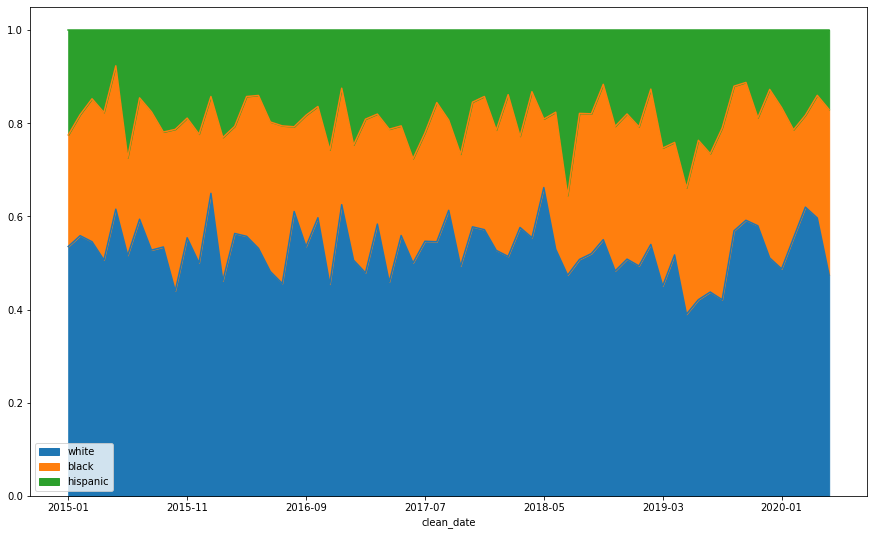

In [10]:
stacked = chart_df.iloc[:,0:4]
stacked = stacked.set_index('clean_date')
stacked = stacked.divide(stacked.sum(axis=1), axis=0)
ax = stacked.plot.area(stacked=True, figsize=(15,9))

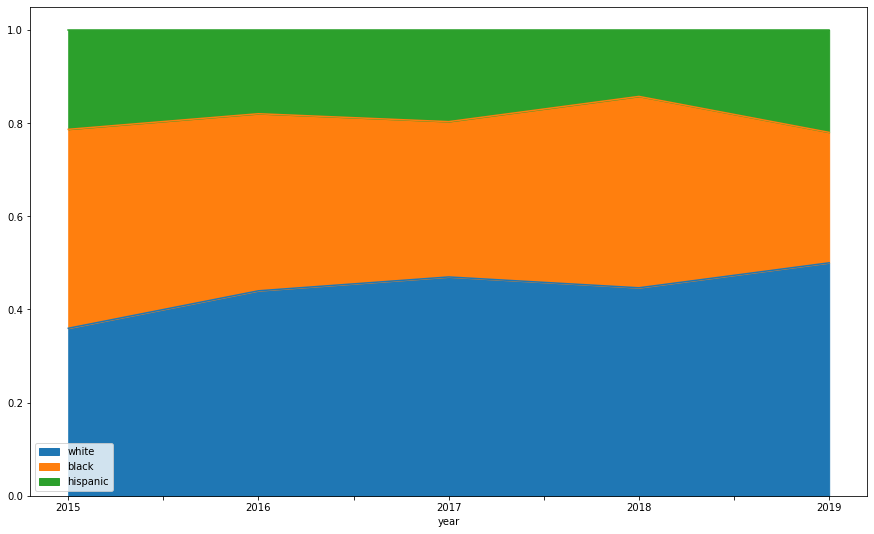

In [11]:
unarmed_stack = unarmed_chart_df.iloc[:,0:4]
unarmed_stack = unarmed_stack.set_index('year')
# grouped = unarmed_stack.groupby('clean')
unarmed_stack = unarmed_stack.divide(unarmed_stack.sum(axis=1), axis=0)
ax = unarmed_stack.plot.area(stacked=True, figsize=(15,9))

In [12]:
articles_df = chart_df.copy()
articles_df

,clean_date,white,black,hispanic,asian,native,datetime
0,2015-01,38,17,16,2.0,1.0,2015-01-01 00:00:00
1,2015-02,43,20,14,0.0,0.0,2015-02-01 00:00:00
2,2015-03,48,27,13,2.0,1.0,2015-03-01 00:00:00
3,2015-04,40,25,14,2.0,1.0,2015-04-01 00:00:00
4,2015-05,40,20,5,1.0,0.0,2015-05-01 00:00:00
...,...,...,...,...,...,...,...
60,2020-01,38,27,13,3.0,0.0,2020-01-01 00:00:00
61,2020-02,31,13,12,2.0,3.0,2020-02-01 00:00:00
62,2020-03,44,14,13,1.0,0.0,2020-03-01 00:00:00
63,2020-04,34,15,8,1.0,0.0,2020-04-01 00:00:00


In [13]:
articles_df['police_shooting_articles'] = ''
for index, row in articles_df.iterrows():
    query = '"police shooting"'
    date = datetime.strptime(row['clean_date'], '%Y-%m').date()
    begin_date = date.strftime('%Y%m%d')
    end_date = (date + relativedelta(months=+1)).strftime('%Y%m%d')
    
    url = f"https://api.nytimes.com/svc/search/v2/articlesearch.json?api-key={news_api}&q={query}&begin_date={begin_date}&end_date={end_date}"
    
    article = requests.get(url).json()
    # max 10 requests per minute
    time.sleep(6)
#     pprint(article)
    articles_df.loc[index, 'police_shooting_articles'] = article['response']['meta']['hits']

In [14]:
articles_df['police_brutality_articles'] = ''
for index, row in articles_df.iterrows():
    query = 'Police Brutality, Misconduct and Shootings'
    date = datetime.strptime(row['clean_date'], '%Y-%m').date()
    begin_date = date.strftime('%Y%m%d')
    end_date = (date + relativedelta(months=+1)).strftime('%Y%m%d')
    
    url = f"https://api.nytimes.com/svc/search/v2/articlesearch.json?api-key={news_api}&q={query}&begin_date={begin_date}&end_date={end_date}"
    
    article = requests.get(url).json()
    # max 10 requests per minute
    time.sleep(6)
#     pprint(article)
    articles_df.loc[index, 'police_brutality_articles'] = article['response']['meta']['hits']

In [15]:
articles_df['protest_articles'] = ''
for index, row in articles_df.iterrows():
    query = 'Demonstrations, Protests and Riots'
    date = datetime.strptime(row['clean_date'], '%Y-%m').date()
    begin_date = date.strftime('%Y%m%d')
    end_date = (date + relativedelta(months=+1)).strftime('%Y%m%d')
    
    url = f"https://api.nytimes.com/svc/search/v2/articlesearch.json?api-key={news_api}&q={query}&begin_date={begin_date}&end_date={end_date}"
    
    article = requests.get(url).json()
    # max 10 requests per minute
    time.sleep(6)
#     pprint(article)
    articles_df.loc[index, 'protest_articles'] = article['response']['meta']['hits']

In [16]:
articles_df['blm_articles'] = ''
for index, row in articles_df.iterrows():
    query = '"Black Lives Matter"'
    date = datetime.strptime(row['clean_date'], '%Y-%m').date()
    begin_date = date.strftime('%Y%m%d')
    end_date = (date + relativedelta(months=+1)).strftime('%Y%m%d')
    
    url = f"https://api.nytimes.com/svc/search/v2/articlesearch.json?api-key={news_api}&q={query}&begin_date={begin_date}&end_date={end_date}"
    
    article = requests.get(url).json()
    # max 10 requests per minute
    time.sleep(6)
#     pprint(article)
    articles_df.loc[index, 'blm_articles'] = article['response']['meta']['hits']

In [131]:
articles_df['inequality_articles'] = ''
for index, row in articles_df.iterrows():
    query = 'racial inequality'
    date = datetime.strptime(row['clean_date'], '%Y-%m').date()
    begin_date = date.strftime('%Y%m%d')
    end_date = (date + relativedelta(months=+1)).strftime('%Y%m%d')
    
    url = f"https://api.nytimes.com/svc/search/v2/articlesearch.json?api-key={news_api}&q={query}&begin_date={begin_date}&end_date={end_date}"
    
    article = requests.get(url).json()
    # max 10 requests per minute
    time.sleep(6)
#     pprint(article)
    articles_df.loc[index, 'inequality_articles'] = article['response']['meta']['hits']

In [127]:
articles_df['pcastile_articles'] = ''
for index, row in articles_df.iterrows():
    query = 'Castile, Philando'
    date = datetime.strptime(row['clean_date'], '%Y-%m').date()
    begin_date = date.strftime('%Y%m%d')
    end_date = (date + relativedelta(months=+1)).strftime('%Y%m%d')
    
    url = f"https://api.nytimes.com/svc/search/v2/articlesearch.json?api-key={news_api}&q={query}&begin_date={begin_date}&end_date={end_date}"
    
    article = requests.get(url).json()
    # max 10 requests per minute
    time.sleep(6)
#     pprint(article)
    articles_df.loc[index, 'pcastile_articles'] = article['response']['meta']['hits']

In [138]:
articles_df['victim_articles'] = ''
for index, row in articles_df.iterrows():
    query = 'black shooting victim'
    date = datetime.strptime(row['clean_date'], '%Y-%m').date()
    begin_date = date.strftime('%Y%m%d')
    end_date = (date + relativedelta(months=+1)).strftime('%Y%m%d')
    
    url = f"https://api.nytimes.com/svc/search/v2/articlesearch.json?api-key={news_api}&q={query}&begin_date={begin_date}&end_date={end_date}"
    
    article = requests.get(url).json()
    # max 10 requests per minute
    time.sleep(6)
#     pprint(article)
    articles_df.loc[index, 'victim_articles'] = article['response']['meta']['hits']

In [139]:
articles_df['injustice_articles'] = ''
for index, row in articles_df.iterrows():
    query = 'racial injustice'
    date = datetime.strptime(row['clean_date'], '%Y-%m').date()
    begin_date = date.strftime('%Y%m%d')
    end_date = (date + relativedelta(months=+1)).strftime('%Y%m%d')
    
    url = f"https://api.nytimes.com/svc/search/v2/articlesearch.json?api-key={news_api}&q={query}&begin_date={begin_date}&end_date={end_date}"
    
    article = requests.get(url).json()
    # max 10 requests per minute
    time.sleep(6)
#     pprint(article)
    articles_df.loc[index, 'injustice_articles'] = article['response']['meta']['hits']

In [ ]:
pprint(article)
# Demonstrations, Protests and Riots

In [141]:
# articles_df.to_csv('Output/articles.csv', index=False)

In [ ]:
articles_df = pd.read_csv('Output/articles.csv')

In [140]:
articles_df

,clean_date,white,black,hispanic,asian,native,datetime,police_shooting_articles,police_brutality_articles,protest_articles,blm_articles,gfloyd_articles,pcastile_articles,inequality_articles,victim_articles,injustice_articles
0,2015-01,38,17,16,2.0,1.0,2015-01-01 00:00:00,5,81,82,10,0,0,44,64,71
1,2015-02,43,20,14,0.0,0.0,2015-02-01 00:00:00,12,38,48,8,0,1,37,44,57
2,2015-03,48,27,13,2.0,1.0,2015-03-01 00:00:00,17,79,58,7,0,0,28,37,59
3,2015-04,40,25,14,2.0,1.0,2015-04-01 00:00:00,29,129,103,6,0,0,37,79,69
4,2015-05,40,20,5,1.0,0.0,2015-05-01 00:00:00,14,104,80,5,0,0,31,61,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,2020-01,38,27,13,3.0,0.0,2020-01-01 00:00:00,3,11,72,11,0,0,67,65,102
61,2020-02,31,13,12,2.0,3.0,2020-02-01 00:00:00,2,10,50,12,0,1,52,56,99
62,2020-03,44,14,13,1.0,0.0,2020-03-01 00:00:00,0,6,23,14,0,3,48,38,76
63,2020-04,34,15,8,1.0,0.0,2020-04-01 00:00:00,1,6,48,9,0,0,81,45,79


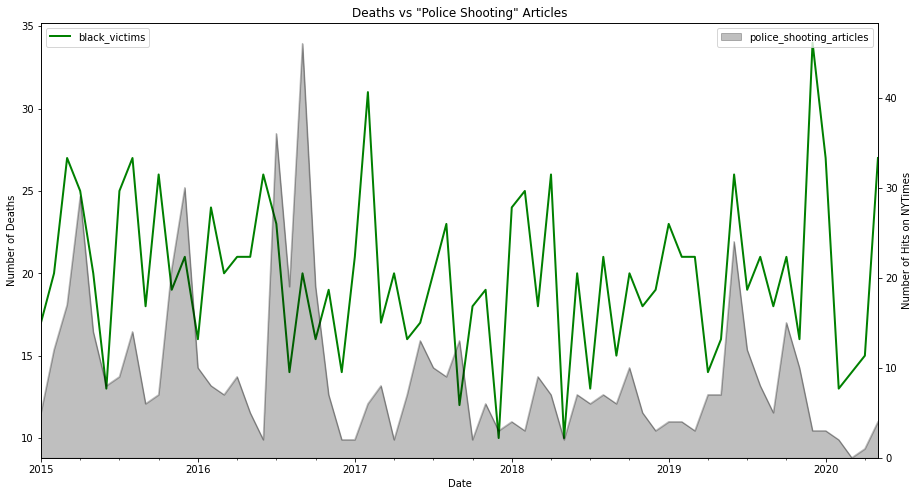

In [152]:
ax = chart_df.plot('datetime', 'black', label='black_victims',figsize=(15,8), color='green', lw=2)

ax2 = ax.twinx()
articles_df.plot.area('datetime', 'police_shooting_articles', label='police_shooting_articles', ax=ax2, alpha=.25, color='black')
leg = ax.legend(loc='upper left')
ax.set(xlabel='Date', ylabel='Number of Deaths', title='Deaths vs "Police Shooting" Articles')
ax2.set(ylabel='Number of Hits on NYTimes')

plt.savefig("Images/deaths_vs_shooting_articles.svg")

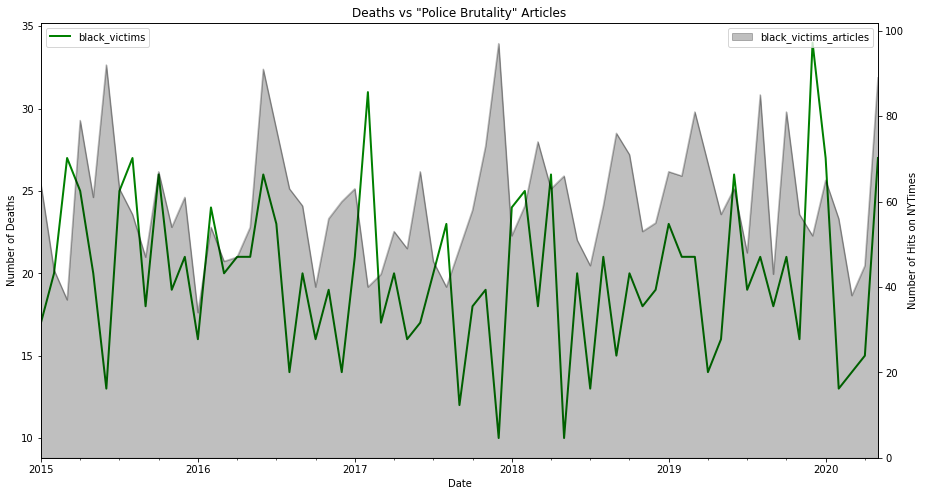

In [151]:
ax = chart_df.plot('datetime', 'black', label='black_victims',figsize=(15,8), color='green', lw=2)

ax2 = ax.twinx()
articles_df.plot.area('datetime', 'victim_articles', label='black_victims_articles', ax=ax2, alpha=.25, color='black')
leg = ax.legend(loc='upper left')
ax.set(xlabel='Date', ylabel='Number of Deaths', title='Deaths vs "Police Brutality" Articles')
ax2.set(ylabel='Number of Hits on NYTimes')

plt.savefig("Images/deaths_vs_victim.svg")

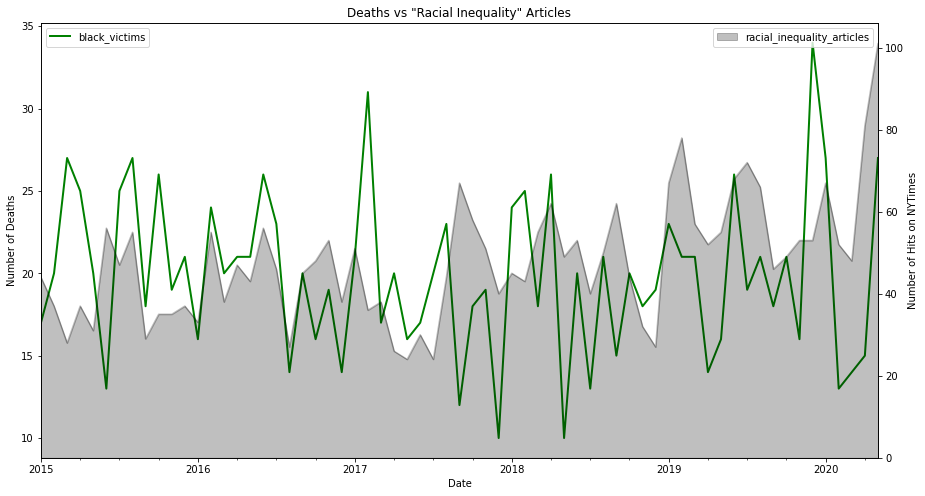

In [148]:
ax = chart_df.plot('datetime', 'black', label='black_victims',figsize=(15,8), color='green', lw=2)

ax2 = ax.twinx()
articles_df.plot.area('datetime', 'inequality_articles', label='racial_inequality_articles', ax=ax2, alpha=.25, color='black')
leg = ax.legend(loc='upper left')
ax.set(xlabel='Date', ylabel='Number of Deaths', title='Deaths vs "Racial Inequality" Articles')
ax2.set(ylabel='Number of Hits on NYTimes')

plt.savefig("Images/death_vs_inequality.svg")

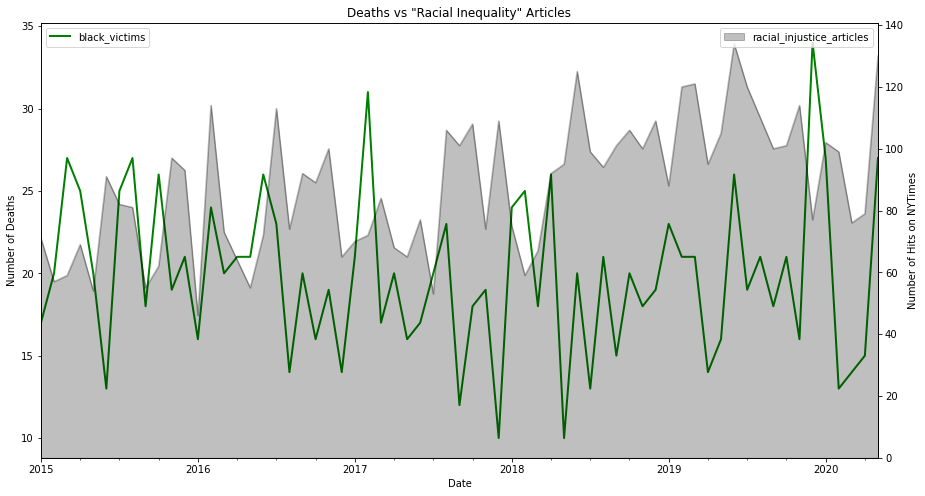

In [153]:
ax = chart_df.plot('datetime', 'black', label='black_victims',figsize=(15,8), color='green', lw=2)

ax2 = ax.twinx()
articles_df.plot.area('datetime', 'injustice_articles', label='racial_injustice_articles', ax=ax2, alpha=.25, color='black')
ax2.legend(loc='upper right')

ax.set(xlabel='Date', ylabel='Number of Deaths', title='Deaths vs "Racial Inequality" Articles')
ax2.set(ylabel='Number of Hits on NYTimes')

plt.savefig("Images/deaths_vs_injustice.svg")

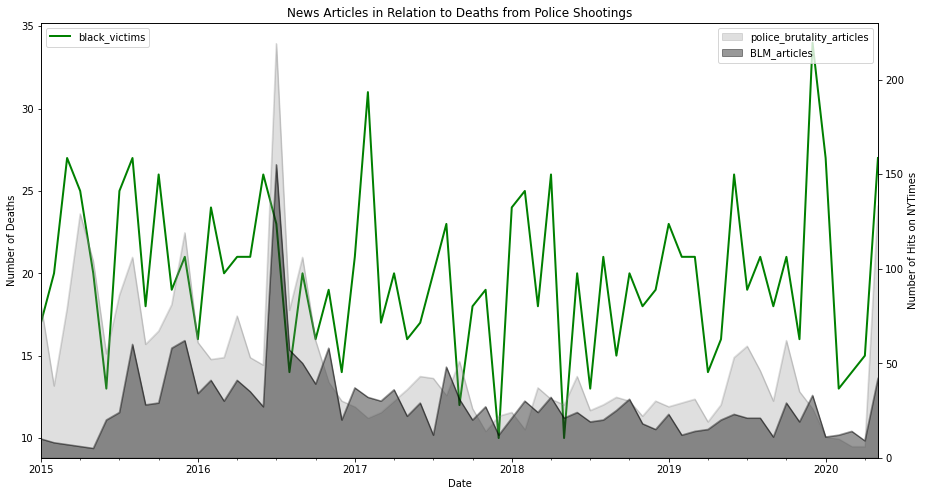

In [149]:
# ax = chart_df.plot('datetime', 'white', label='white', figsize=(12,6))
ax = chart_df.plot('datetime', 'black', label='black_victims',figsize=(15,8), color='green', lw=2)
# chart_df.plot('datetime', 'hispanic', label='hispanic', ax=ax)

ax2 = ax.twinx()
articles_df.plot.area('datetime', 'police_brutality_articles', label='police_brutality_articles', ax=ax2, alpha=.25, color='grey')
# articles_df.plot.area('datetime', 'protest_articles', label='protest_articles', ax=ax2, alpha=.4)
articles_df.plot.area('datetime', 'blm_articles', label='BLM_articles', ax=ax2, alpha=.4, color='black')
leg = ax.legend(loc='upper left', ncol=6)
ax.set(xlabel='Date', ylabel='Number of Deaths', title='News Articles in Relation to Deaths from Police Shootings')
ax2.set(ylabel='Number of Hits on NYTimes')
# plt.axvline(datetime(2016, 7, 6), color='black')
# plt.axvline(datetime(2020, 5, 25), color='black')

plt.savefig("Images/news_vs_blackvic.svg")

In [155]:
sts.f_oneway(articles_df['police_shooting_articles'], articles_df['police_brutality_articles'],
             articles_df['protest_articles'], articles_df['blm_articles'])


F_onewayResult(statistic=79.36222755477198, pvalue=2.5032629834924694e-36)

In [156]:
sts.f_oneway(articles_df['police_shooting_articles'], chart_df['black'])

F_onewayResult(statistic=75.01096630642084, pvalue=1.7311982493020525e-14)

In [96]:
sorted_df = articles_df.sort_values('black', ascending=False)
sorted_df

,clean_date,white,black,hispanic,asian,native,datetime,police_shooting_articles,police_brutality_articles,protest_articles,blm_articles
59,2019-12,48,34,12,2.0,1.0,2019-12-01 00:00:00,3,26,102,33
25,2017-02,45,31,18,2.0,1.0,2017-02-01 00:00:00,6,21,87,32
64,2020-05,36,27,13,1.0,0.0,2020-05-01 00:00:00,4,133,158,42
2,2015-03,48,27,13,2.0,1.0,2015-03-01 00:00:00,17,79,58,7
60,2020-01,38,27,13,3.0,0.0,2020-01-01 00:00:00,3,11,72,11
...,...,...,...,...,...,...,...,...,...,...,...
5,2015-06,32,13,17,0.0,1.0,2015-06-01 00:00:00,8,55,68,20
61,2020-02,31,13,12,2.0,3.0,2020-02-01 00:00:00,2,10,50,12
32,2017-09,38,12,12,0.0,2.0,2017-09-01 00:00:00,13,51,81,31
35,2017-12,20,10,5,1.0,3.0,2017-12-01 00:00:00,3,22,44,12


In [45]:
# finding the victim of the spike in 2016
query = 'Police Brutality, Misconduct and Shootings'
begin_date = '20160701'
end_date = '20160801'

url = f"https://api.nytimes.com/svc/search/v2/articlesearch.json?api-key={news_api}&q={query}&begin_date={begin_date}&end_date={end_date}"

article = requests.get(url).json()
pprint(article['response']['docs'][2]['keywords'])

[{'major': 'N',
  'name': 'subject',
  'rank': 1,
  'value': 'Police Brutality, Misconduct and Shootings'},
 {'major': 'N', 'name': 'persons', 'rank': 2, 'value': 'Schweber, Nate'},
 {'major': 'N',
  'name': 'organizations',
  'rank': 3,
  'value': 'Police Department (NYC)'},
 {'major': 'N', 'name': 'persons', 'rank': 4, 'value': 'Rojas, Rick'},
 {'major': 'N',
  'name': 'glocations',
  'rank': 5,
  'value': 'Maspeth (Queens, NY)'},
 {'major': 'N', 'name': 'glocations', 'rank': 6, 'value': 'New York City'},
 {'major': 'N', 'name': 'subject', 'rank': 7, 'value': 'Robberies and Thefts'}]


In [46]:
philando = shooting_df.loc[shooting_df['name'] == 'Philando Castile']
alton = shooting_df.loc[shooting_df['name'] == 'Alton Sterling']
philando['date']

1464    2016-07-06
Name: date, dtype: object

In [ ]:
query = '"Floyd, George"'
# date = datetime.strptime(row['clean_date'], '%Y-%m').date()
begin_date = '20200102'
end_date = '20201002'

url = f"https://api.nytimes.com/svc/search/v2/articlesearch.json?api-key={news_api}&q={query}&begin_date={begin_date}&end_date={end_date}"

response = requests.get(url).json()
pprint(response)

In [80]:
protest_df = pd.read_csv('grouped_protest.csv')
protest_df['datetime'] = ''
for index, row in protest_df.iterrows():
    protest_df.loc[index, 'datetime']= datetime.strptime(row['clean_date'], '%Y-%m')
merge_protest = pd.merge(chart_df, protest_df, on='clean_date', how='left')
merge_protest = merge_protest.fillna(0)
merge_protest

,clean_date,white,black,hispanic,asian,native,datetime_x,Attendees,datetime_y
0,2015-01,38,17,16,2.0,1.0,2015-01-01,0.0,0
1,2015-02,43,20,14,0.0,0.0,2015-02-01,0.0,0
2,2015-03,48,27,13,2.0,1.0,2015-03-01,0.0,0
3,2015-04,40,25,14,2.0,1.0,2015-04-01,0.0,0
4,2015-05,40,20,5,1.0,0.0,2015-05-01,0.0,0
...,...,...,...,...,...,...,...,...,...
60,2020-01,38,27,13,3.0,0.0,2020-01-01,125617.0,2020-01-01 00:00:00
61,2020-02,31,13,12,2.0,3.0,2020-02-01,1205.0,2020-02-01 00:00:00
62,2020-03,44,14,13,1.0,0.0,2020-03-01,840.0,2020-03-01 00:00:00
63,2020-04,34,15,8,1.0,0.0,2020-04-01,0.0,2020-04-01 00:00:00


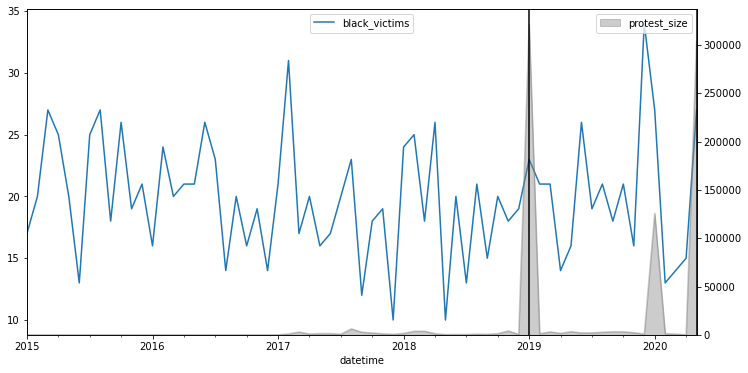

In [100]:
ax = chart_df.plot('datetime', 'black', label='black_victims',figsize=(12,6))

ax2 = ax.twinx()
merge_protest.plot.area('datetime_x', 'Attendees', label='protest_size', ax=ax2, alpha=.4, color='grey')
leg = ax.legend(loc='upper center', ncol=6)
plt.axvline(datetime(2019, 1, 6), color='black')
plt.axvline(datetime(2020, 5, 25), color='black')

In [87]:
# finding the victim of the spike in 2016
query = 'Police Brutality, Misconduct and Shootings'
begin_date = '20200101'
end_date = '20200201'

url = f"https://api.nytimes.com/svc/search/v2/articlesearch.json?api-key={news_api}&q={query}&begin_date={begin_date}&end_date={end_date}"

article = requests.get(url).json()
pprint(article)

{'copyright': 'Copyright (c) 2020 The New York Times Company. All Rights '
              'Reserved.',
 'response': {'docs': [{'_id': 'nyt://article/9dd69c10-c338-5a2e-9001-b27e54f5442d',
                        'abstract': 'Michael Owen, a Prince George’s County '
                                    'police corporal, shot William H. Green '
                                    'seven times while he was handcuffed in a '
                                    'patrol car, the authorities said.',
                        'byline': {'organization': None,
                                   'original': 'By Neil Vigdor, Mariel Padilla '
                                               'and Sandra E. Garcia',
                                   'person': [{'firstname': 'Neil',
                                               'lastname': 'Vigdor',
                                               'middlename': None,
                                               'organization': '',
                        

                                        'rank': 0,
                                        'subType': 'mediumThreeByTwo252',
                                        'subtype': 'mediumThreeByTwo252',
                                        'type': 'image',
                                        'url': 'images/2020/01/28/multimedia/28xp-handcuffedSUB/28xp-handcuffedSUB-mediumThreeByTwo252.jpg',
                                        'width': 252},
                                       {'caption': None,
                                        'credit': None,
                                        'crop_name': 'mediumThreeByTwo378',
                                        'height': 252,
                                        'legacy': {},
                                        'rank': 0,
                                        'subType': 'mediumThreeByTwo378',
                                        'subtype': 'mediumThreeByTwo378',
                                        'type': 'im

                                        'legacy': {},
                                        'rank': 0,
                                        'subType': 'tmagArticle',
                                        'subtype': 'tmagArticle',
                                        'type': 'image',
                                        'url': 'images/2020/01/26/nyregion/25rrnewsletter1/002sons30-tmagArticle.jpg',
                                        'width': 592},
                                       {'caption': None,
                                        'credit': None,
                                        'crop_name': 'slide',
                                        'height': 400,
                                        'legacy': {},
                                        'rank': 0,
                                        'subType': 'slide',
                                        'subtype': 'slide',
                                        'type': 'image',
                    

                                        'width': 96},
                                       {'caption': None,
                                        'credit': None,
                                        'crop_name': 'videoSixteenByNine768',
                                        'height': 432,
                                        'legacy': {},
                                        'rank': 0,
                                        'subType': 'videoSixteenByNine768',
                                        'subtype': 'videoSixteenByNine768',
                                        'type': 'image',
                                        'url': 'images/2020/01/26/nyregion/25rrnewsletter1/002sons30-videoSixteenByNine768.jpg',
                                        'width': 768},
                                       {'caption': None,
                                        'credit': None,
                                        'crop_name': 'videoSixteenByNine150',
           

                                        'rank': 0,
                                        'subType': 'largeWidescreen1050',
                                        'subtype': 'largeWidescreen1050',
                                        'type': 'image',
                                        'url': 'images/2020/01/25/insider/26insider-twosons-2/26insider-twosons-2-largeWidescreen1050.jpg',
                                        'width': 1050},
                                       {'caption': None,
                                        'credit': None,
                                        'crop_name': 'thumbWide',
                                        'height': 126,
                                        'legacy': {'wide': 'images/2020/01/25/insider/26insider-twosons-2/26insider-twosons-2-thumbWide.jpg',
                                                   'wideheight': 126,
                                                   'widewidth': 190},
                                

                                        'legacy': {},
                                        'rank': 0,
                                        'subType': 'master1050',
                                        'subtype': 'master1050',
                                        'type': 'image',
                                        'url': 'images/2020/01/26/nyregion/262SONS2/002sons30-master1050.jpg',
                                        'width': 1050},
                                       {'caption': None,
                                        'credit': None,
                                        'crop_name': 'master675',
                                        'height': 450,
                                        'legacy': {},
                                        'rank': 0,
                                        'subType': 'master675',
                                        'subtype': 'master675',
                                        'type': 'image',
                 

                                        'subtype': 'videoSixteenByNine150',
                                        'type': 'image',
                                        'url': 'images/2020/01/26/nyregion/262SONS2/002sons30-videoSixteenByNine150.jpg',
                                        'width': 150},
                                       {'caption': None,
                                        'credit': None,
                                        'crop_name': 'videoSixteenByNineJumbo1600',
                                        'height': 901,
                                        'legacy': {},
                                        'rank': 0,
                                        'subType': 'videoSixteenByNineJumbo1600',
                                        'subtype': 'videoSixteenByNineJumbo1600',
                                        'type': 'image',
                                        'url': 'images/2020/01/26/nyregion/262SONS2/002sons30-videoSixteenByNine

                                        'url': 'images/2020/01/27/world/27france-grenades1/merlin_166977636_cea02add-d16a-4c94-8972-ae045be1bd89-horizontalMediumAt2X.jpg',
                                        'width': 5143},
                                       {'caption': None,
                                        'credit': None,
                                        'crop_name': 'hpLarge',
                                        'height': 287,
                                        'legacy': {},
                                        'rank': 0,
                                        'subType': 'hpLarge',
                                        'subtype': 'hpLarge',
                                        'type': 'image',
                                        'url': 'images/2020/01/27/world/27france-grenades1/27france-grenades1-hpLarge.jpg',
                                        'width': 511},
                                       {'caption': None,
                  

                                        'width': 225},
                                       {'caption': None,
                                        'credit': None,
                                        'crop_name': 'master1050',
                                        'height': 772,
                                        'legacy': {},
                                        'rank': 0,
                                        'subType': 'master1050',
                                        'subtype': 'master1050',
                                        'type': 'image',
                                        'url': 'images/2020/01/23/multimedia/23xp-stormy/merlin_161611143_4fcb6576-0282-4a41-a3fc-6fa220821367-master1050.jpg',
                                        'width': 1050},
                                       {'caption': None,
                                        'credit': None,
                                        'crop_name': 'master675',
                       

                                       {'caption': None,
                                        'credit': None,
                                        'crop_name': 'watch308',
                                        'height': 348,
                                        'legacy': {},
                                        'rank': 0,
                                        'subType': 'watch308',
                                        'subtype': 'watch308',
                                        'type': 'image',
                                        'url': 'images/2020/01/23/multimedia/23xp-stormy/merlin_161611143_4fcb6576-0282-4a41-a3fc-6fa220821367-watch308.jpg',
                                        'width': 312},
                                       {'caption': None,
                                        'credit': None,
                                        'crop_name': 'watch268',
                                        'height': 303,
                                 

                                        'url': 'images/2020/01/28/opinion/28barbara1/28barbara1-videoLarge.jpg',
                                        'width': 768},
                                       {'caption': None,
                                        'credit': None,
                                        'crop_name': 'mediumThreeByTwo210',
                                        'height': 140,
                                        'legacy': {},
                                        'rank': 0,
                                        'subType': 'mediumThreeByTwo210',
                                        'subtype': 'mediumThreeByTwo210',
                                        'type': 'image',
                                        'url': 'images/2020/01/28/opinion/28barbara1/28barbara1-mediumThreeByTwo210.jpg',
                                        'width': 210},
                                       {'caption': None,
                                        'cre

                                        'credit': None,
                                        'crop_name': 'superJumbo',
                                        'height': 2048,
                                        'legacy': {},
                                        'rank': 0,
                                        'subType': 'superJumbo',
                                        'subtype': 'superJumbo',
                                        'type': 'image',
                                        'url': 'images/2020/01/17/multimedia/00-racism-quiz-02/00-racism-quiz-02-superJumbo-v5.jpg',
                                        'width': 2025},
                                       {'caption': None,
                                        'credit': None,
                                        'crop_name': 'blog225',
                                        'height': 228,
                                        'legacy': {},
                                        'rank': 0,
   

                                        'width': 390},
                                       {'caption': None,
                                        'credit': None,
                                        'crop_name': 'videoSixteenByNine1050',
                                        'height': 591,
                                        'legacy': {},
                                        'rank': 0,
                                        'subType': 'videoSixteenByNine1050',
                                        'subtype': 'videoSixteenByNine1050',
                                        'type': 'image',
                                        'url': 'images/2020/01/17/multimedia/00-racism-quiz-02/00-racism-quiz-02-videoSixteenByNine1050-v6.jpg',
                                        'width': 1050},
                                       {'caption': None,
                                        'credit': None,
                                        'crop_name': 'videoSixteenBy

                                        'subType': 'largeHorizontal375',
                                        'subtype': 'largeHorizontal375',
                                        'type': 'image',
                                        'url': 'images/2020/01/13/us/13KLANLAW-gardner/13KLANLAW-gardner-largeHorizontal375-v2.jpg',
                                        'width': 375},
                                       {'caption': None,
                                        'credit': None,
                                        'crop_name': 'largeHorizontalJumbo',
                                        'height': 683,
                                        'legacy': {},
                                        'rank': 0,
                                        'subType': 'largeHorizontalJumbo',
                                        'subtype': 'largeHorizontalJumbo',
                                        'type': 'image',
                                        'url': 'imag

                                   'original': 'By Edgar Sandoval and Azi '
                                               'Paybarah',
                                   'person': [{'firstname': 'Edgar',
                                               'lastname': 'Sandoval',
                                               'middlename': None,
                                               'organization': '',
                                               'qualifier': None,
                                               'rank': 1,
                                               'role': 'reported',
                                               'title': None},
                                              {'firstname': 'Azi',
                                               'lastname': 'Paybarah',
                                               'middlename': None,
                                               'organization': '',
                                               'qualifier': None,

                                       {'caption': None,
                                        'credit': None,
                                        'crop_name': 'articleInline',
                                        'height': 127,
                                        'legacy': {},
                                        'rank': 0,
                                        'subType': 'articleInline',
                                        'subtype': 'articleInline',
                                        'type': 'image',
                                        'url': 'images/2020/01/10/nyregion/09police-shooting01/merlin_166880442_f155cbde-b9a1-496f-95dd-8fc3db2eeed1-articleInline.jpg',
                                        'width': 190},
                                       {'caption': None,
                                        'credit': None,
                                        'crop_name': 'hpSmall',
                                        'height': 109,
        

In [103]:
# finding the victim of the spike in 2016
query = '"Elliot, Tim"'
begin_date = '20150102'
end_date = '20150402'

url = f"https://api.nytimes.com/svc/search/v2/articlesearch.json?api-key={news_api}&q={query}&begin_date={begin_date}&end_date={end_date}"

article = requests.get(url).json()
pprint(article)

{'copyright': 'Copyright (c) 2020 The New York Times Company. All Rights '
              'Reserved.',
 'response': {'docs': [], 'meta': {'hits': 0, 'offset': 0, 'time': 60}},
 'status': 'OK'}
